In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [4]:
## treat the null vaues
df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0], inplace=True)
df['Sleep Disorder'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_11604\793765670.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Disorder'].fillna(df['Sleep Disorder'].mode()[0], inplace=True)


Sleep Disorder
Sleep Apnea    297
Insomnia        77
Name: count, dtype: int64

In [5]:
## encoded the rows
le_gender = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])

df = pd.get_dummies(df, columns=['BMI Category'], drop_first=True, dtype=int)

## encode the target column
le_sleep_disorder = LabelEncoder()

df['Sleep Disorder'] = le_sleep_disorder.fit_transform(df['Sleep Disorder'])
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,1,27,Software Engineer,6.1,6,42,6,126/83,77,4200,1,0,0,1
1,2,1,28,Doctor,6.2,6,60,8,125/80,75,10000,1,0,0,0
2,3,1,28,Doctor,6.2,6,60,8,125/80,75,10000,1,0,0,0
3,4,1,28,Sales Representative,5.9,4,30,8,140/90,85,3000,1,0,1,0
4,5,1,28,Sales Representative,5.9,4,30,8,140/90,85,3000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,Nurse,8.1,9,75,3,140/95,68,7000,1,0,0,1
370,371,0,59,Nurse,8.0,9,75,3,140/95,68,7000,1,0,0,1
371,372,0,59,Nurse,8.1,9,75,3,140/95,68,7000,1,0,0,1
372,373,0,59,Nurse,8.1,9,75,3,140/95,68,7000,1,0,0,1


In [6]:
## drop the column personID, Occupation
df = df.drop(columns=['Person ID', 'Occupation'])  # optional: drop ID too


In [7]:
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,27,6.1,6,42,6,126/83,77,4200,1,0,0,1
1,1,28,6.2,6,60,8,125/80,75,10000,1,0,0,0
2,1,28,6.2,6,60,8,125/80,75,10000,1,0,0,0
3,1,28,5.9,4,30,8,140/90,85,3000,1,0,1,0
4,1,28,5.9,4,30,8,140/90,85,3000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,8.1,9,75,3,140/95,68,7000,1,0,0,1
370,0,59,8.0,9,75,3,140/95,68,7000,1,0,0,1
371,0,59,8.1,9,75,3,140/95,68,7000,1,0,0,1
372,0,59,8.1,9,75,3,140/95,68,7000,1,0,0,1


In [8]:
## blood pressure divided into two parts systolic bp and distolic bp 
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
## drop the bp column
df = df.drop(columns=['Blood Pressure'])

In [9]:
## add the pulse pressure column
df['Pulse_Pressure'] = df['Systolic_BP'] - df['Diastolic_BP']

In [10]:
df['High_BP'] = ((df['Systolic_BP'] >= 130) | (df['Diastolic_BP'] >= 85)).astype(int)
df['Low_BP'] = ((df['Systolic_BP'] < 90) | (df['Diastolic_BP'] < 60)).astype(int)
df

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,Systolic_BP,Diastolic_BP,Pulse_Pressure,High_BP,Low_BP
0,1,27,6.1,6,42,6,77,4200,1,0,0,1,126,83,43,0,0
1,1,28,6.2,6,60,8,75,10000,1,0,0,0,125,80,45,0,0
2,1,28,6.2,6,60,8,75,10000,1,0,0,0,125,80,45,0,0
3,1,28,5.9,4,30,8,85,3000,1,0,1,0,140,90,50,1,0
4,1,28,5.9,4,30,8,85,3000,1,0,1,0,140,90,50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,59,8.1,9,75,3,68,7000,1,0,0,1,140,95,45,1,0
370,0,59,8.0,9,75,3,68,7000,1,0,0,1,140,95,45,1,0
371,0,59,8.1,9,75,3,68,7000,1,0,0,1,140,95,45,1,0
372,0,59,8.1,9,75,3,68,7000,1,0,0,1,140,95,45,1,0


## Perform the eda

In [11]:
## Step 1 Basic Overview

print(df.shape)
print(df.info())
print(df.describe())
print(df['Sleep Disorder'].value_counts())


(374, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      374 non-null    int32  
 1   Age                         374 non-null    int64  
 2   Sleep Duration              374 non-null    float64
 3   Quality of Sleep            374 non-null    int64  
 4   Physical Activity Level     374 non-null    int64  
 5   Stress Level                374 non-null    int64  
 6   Heart Rate                  374 non-null    int64  
 7   Daily Steps                 374 non-null    int64  
 8   Sleep Disorder              374 non-null    int32  
 9   BMI Category_Normal Weight  374 non-null    int32  
 10  BMI Category_Obese          374 non-null    int32  
 11  BMI Category_Overweight     374 non-null    int32  
 12  Systolic_BP                 374 non-null    int32  
 13  Diastolic_BP             

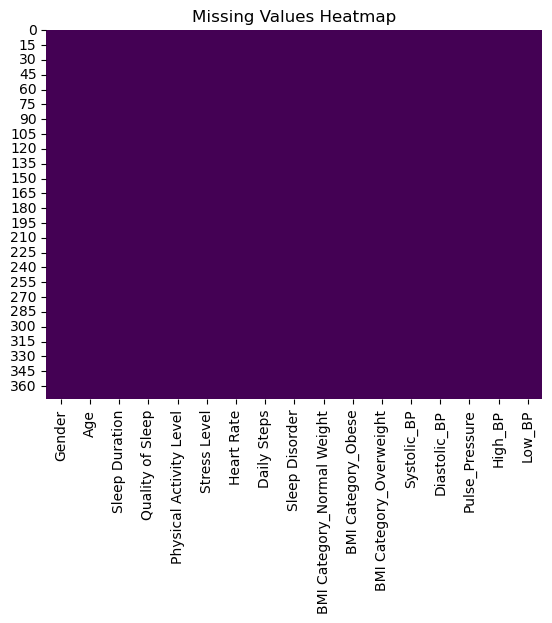

In [53]:
## Step 2: Check Missing Values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

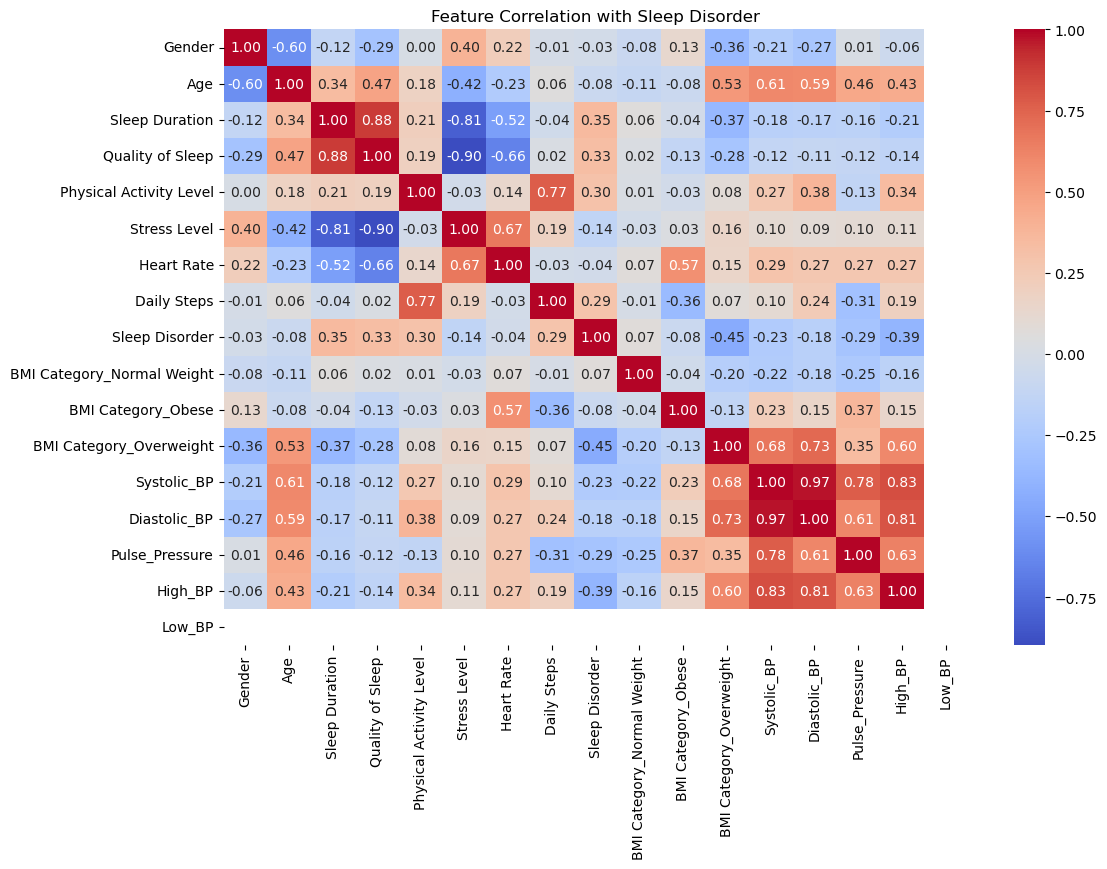

In [12]:
## Step 3: Feature Correlation with Sleep Disorder
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Sleep Disorder")
plt.show()


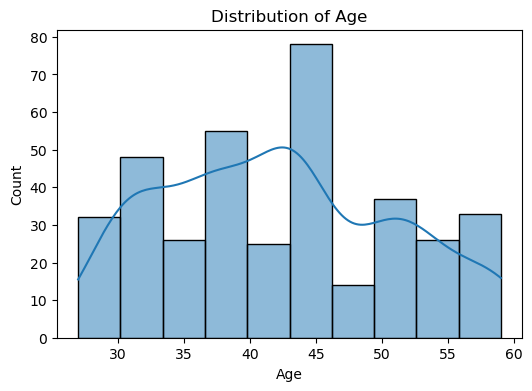

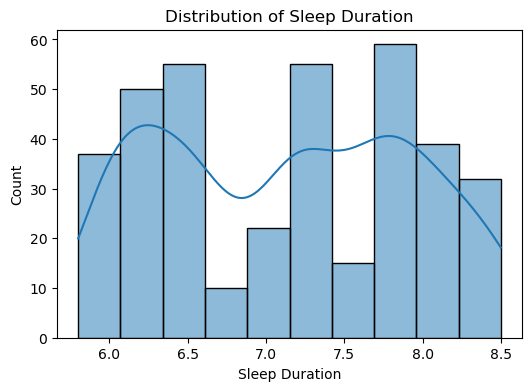

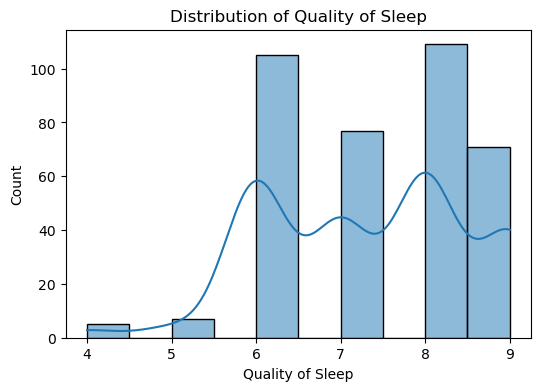

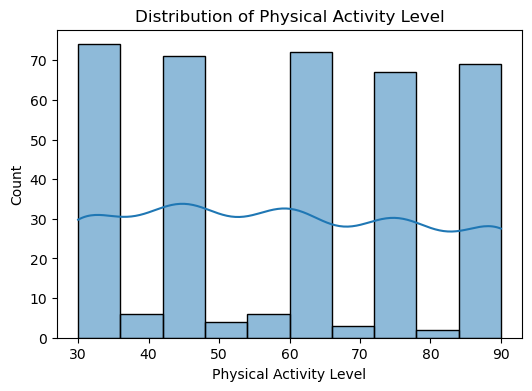

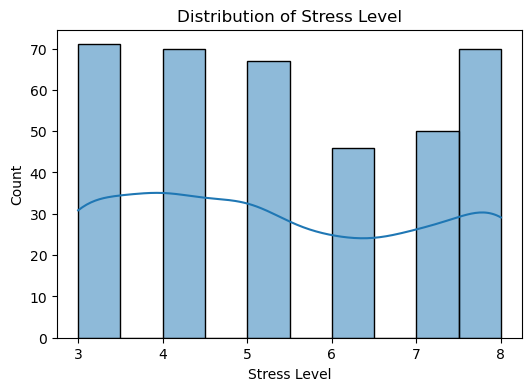

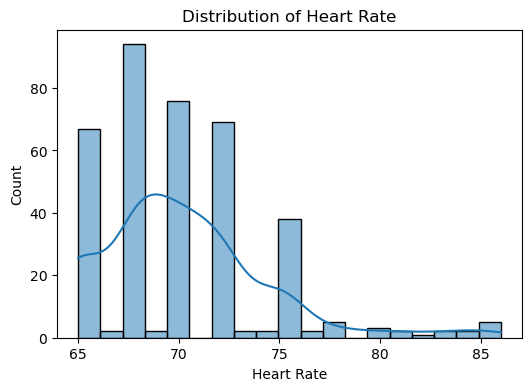

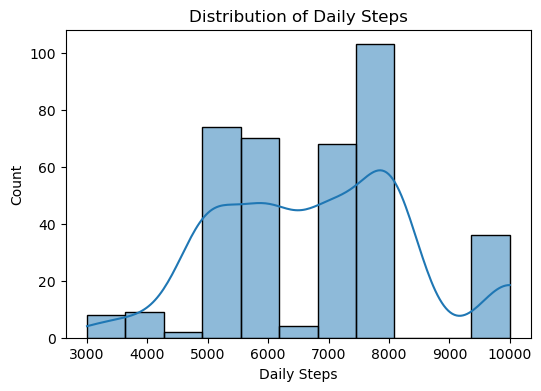

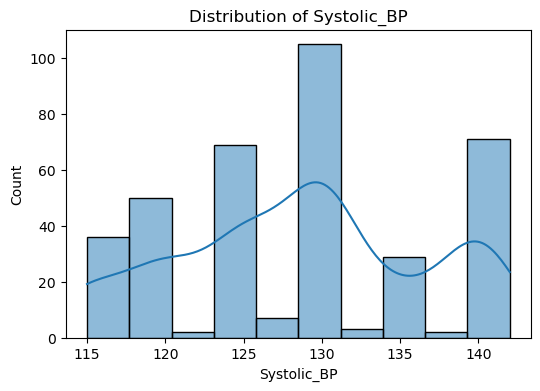

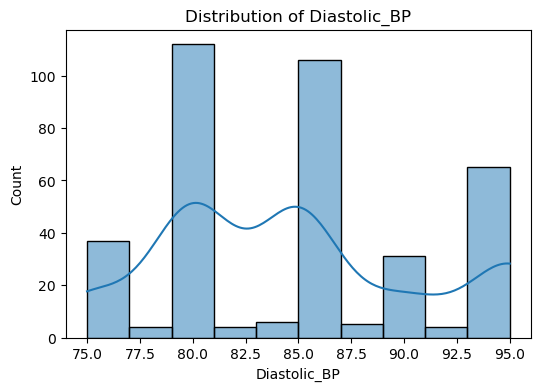

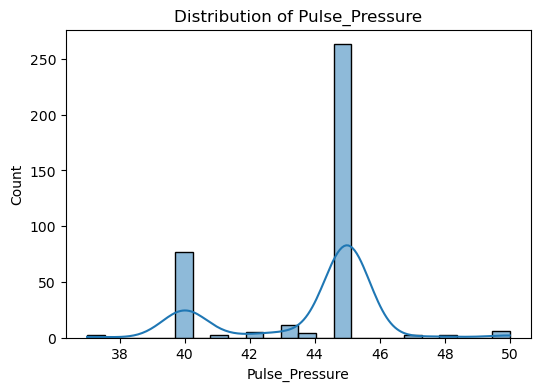

In [13]:
## Step 4: Distribution Plots
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                  'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP', 'Pulse_Pressure']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


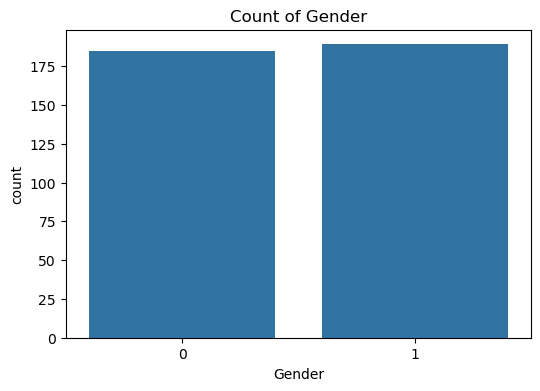

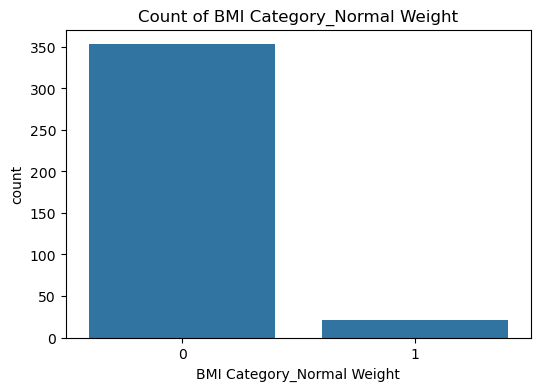

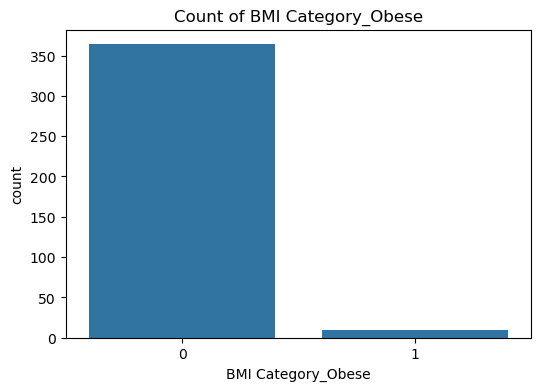

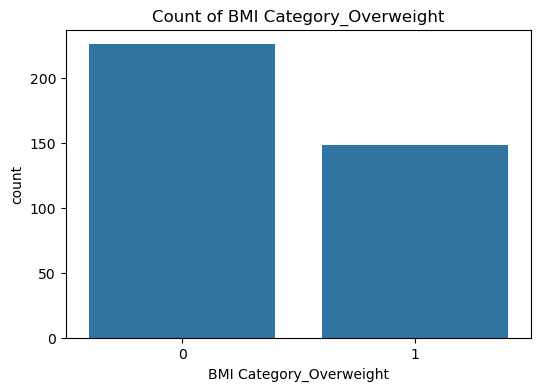

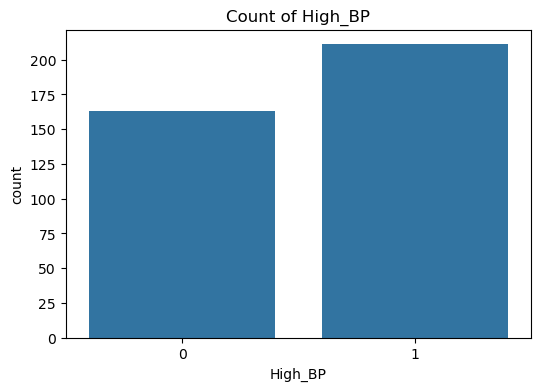

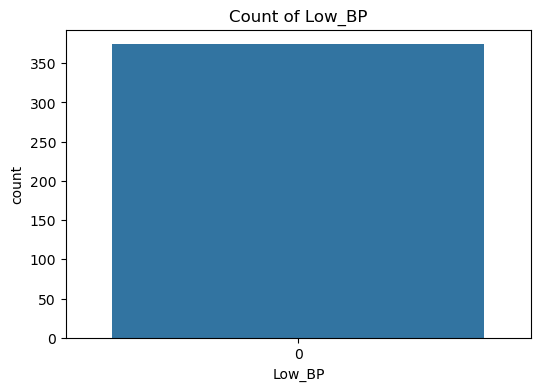

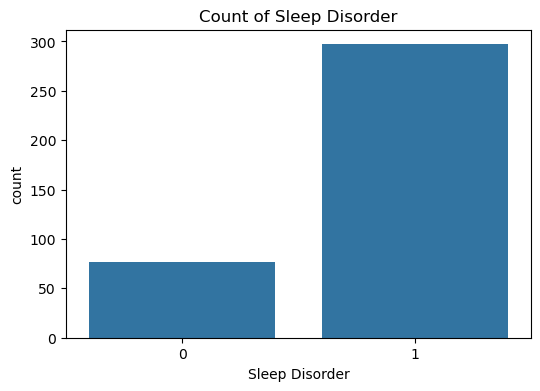

In [14]:
## Step 5: Count Plots for Categorical Features

categorical_cols = ['Gender', 'BMI Category_Normal Weight', 'BMI Category_Obese', 
                    'BMI Category_Overweight', 'High_BP', 'Low_BP', 'Sleep Disorder']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.show()


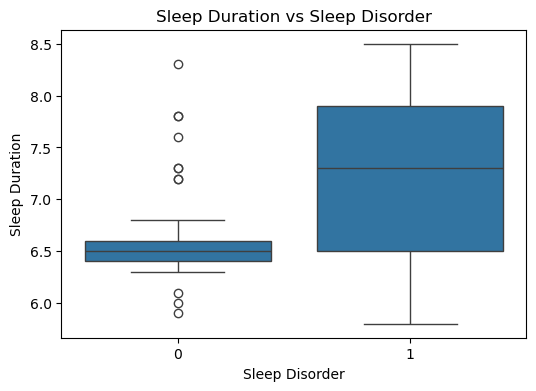

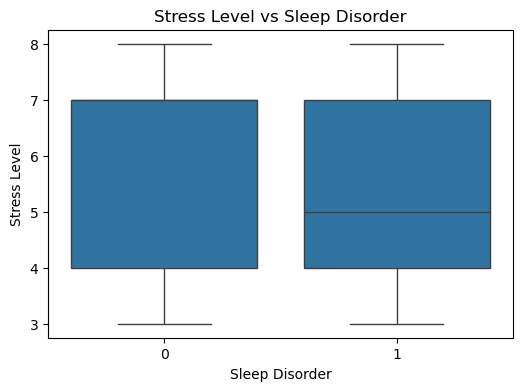

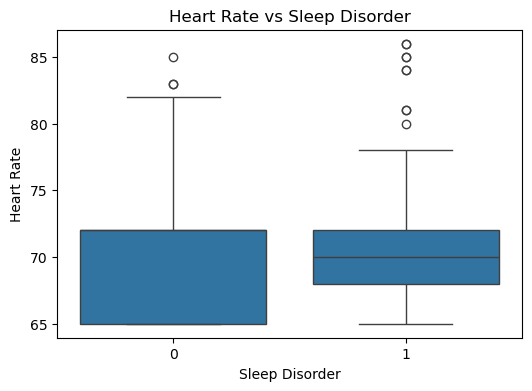

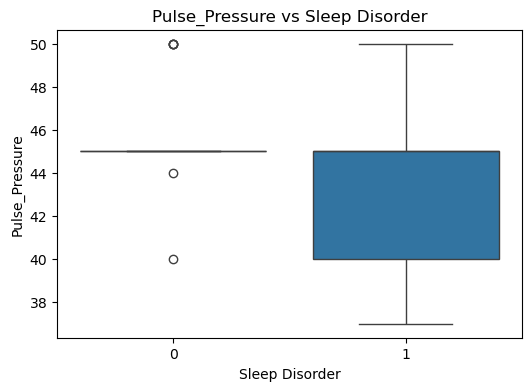

In [15]:
##  Step 6: Boxplots to Compare with Target
features_to_compare = ['Sleep Duration', 'Stress Level', 'Heart Rate', 'Pulse_Pressure']

for col in features_to_compare:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Sleep Disorder', y=col, data=df)
    plt.title(f'{col} vs Sleep Disorder')
    plt.show()

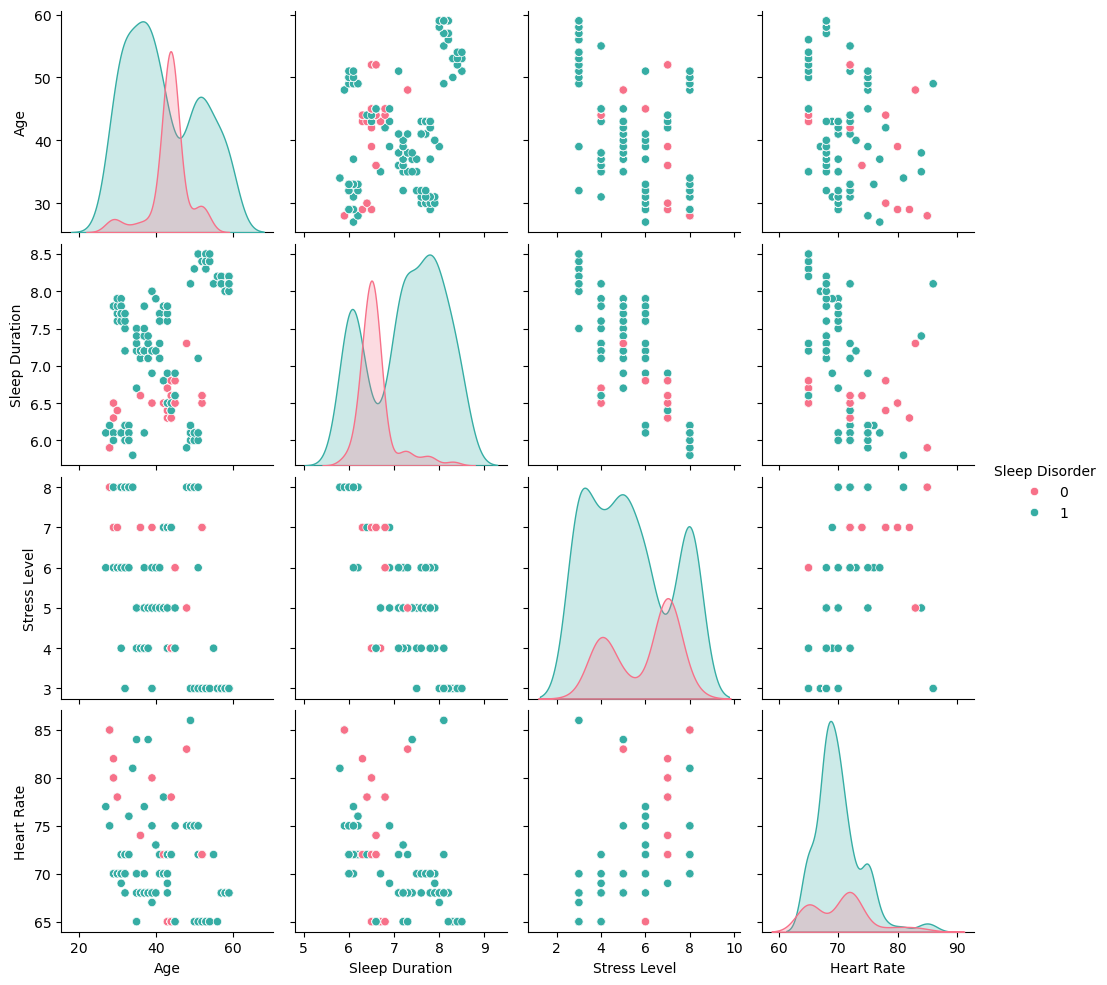

In [16]:
## Step 7: Pairplot
# Only include relevant features
eda_cols = ['Age', 'Sleep Duration', 'Stress Level', 'Heart Rate', 'Sleep Disorder']
sns.pairplot(df[eda_cols], hue='Sleep Disorder', palette='husl')
plt.show()


In [17]:
## Step 8: Group Statistics
print(df.groupby('Sleep Disorder')[['Sleep Duration', 'Stress Level', 'Heart Rate', 'Pulse_Pressure']].mean())


                Sleep Duration  Stress Level  Heart Rate  Pulse_Pressure
Sleep Disorder                                                          
0                     6.589610      5.870130   70.467532       45.181818
1                     7.272727      5.259259   70.087542       43.572391


## Training and testing the data


In [22]:
#Split the data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [23]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)

#DecisionTree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
models = {'Logistic Regression' : lr, 'Decision Tree' : dt, 'Random Forest' : rf}

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"{name}")
    print("Accuracy: ", accuracy_score(y_test,y_pred))
    print("Precision: ", precision_score(y_test,y_pred,average='weighted'))
    print("Recall Score: ", recall_score(y_test,y_pred,average='weighted'))
    print("F1 Score: ", f1_score(y_test,y_pred,average='weighted'))

Logistic Regression
Accuracy:  0.8
Precision:  0.64
Recall Score:  0.8
F1 Score:  0.711111111111111
Decision Tree
Accuracy:  0.92
Precision:  0.9253549695740366
Recall Score:  0.92
F1 Score:  0.9218220338983052
Random Forest
Accuracy:  0.96
Precision:  0.9594847775175643
Recall Score:  0.96
F1 Score:  0.9594756340837846


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


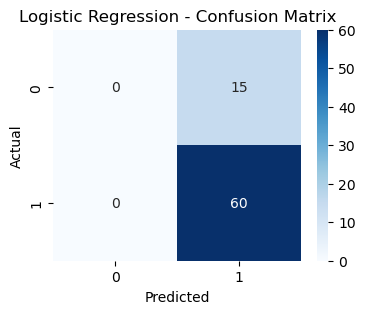

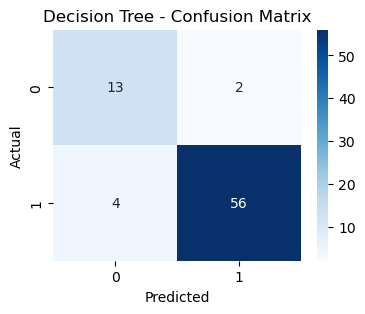

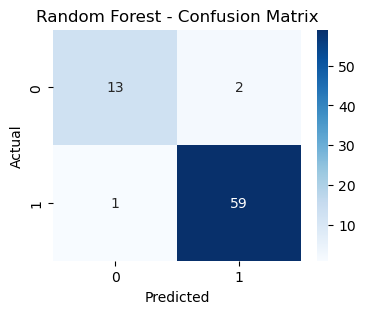

In [26]:
from sklearn.metrics import confusion_matrix
for name, model in models.items():
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [33]:
## Save model
import joblib
joblib.dump(model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl') 

['scaler.pkl']

## Streamlit

In [34]:
import streamlit as st
import numpy as np
import pickle

# Load model and scaler
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("🛌 Sleep Disorder Prediction App")

st.markdown("### Please enter your health and lifestyle details:")

# --- Input Fields ---
gender = st.selectbox("Gender", ["Male", "Female"])
age = st.slider("Age", 10, 100, 25)
sleep_duration = st.slider("Sleep Duration (hours)", 0.0, 12.0, 7.0)
quality_of_sleep = st.slider("Quality of Sleep (1-10)", 1, 10, 5)
physical_activity = st.slider("Physical Activity Level (1-10)", 1, 10, 5)
stress_level = st.slider("Stress Level (1-10)", 1, 10, 5)
heart_rate = st.number_input("Heart Rate (bpm)", 40, 150, 70)
daily_steps = st.number_input("Daily Steps", 0, 30000, 7000)
bmi_category = st.selectbox("BMI Category", ["Normal Weight", "Overweight", "Obese"])
systolic = st.number_input("Systolic Blood Pressure", 80, 200, 120)
diastolic = st.number_input("Diastolic Blood Pressure", 50, 130, 80)

# --- Feature Engineering ---
pulse_pressure = systolic - diastolic
high_bp = 1 if diastolic > 85 else 0
low_bp = 1 if systolic < 90 or diastolic < 60 else 0

# --- Manual Encoding ---
gender = 1 if gender == "Male" else 0
bmi_normal = 1 if bmi_category == "Normal Weight" else 0
bmi_overweight = 1 if bmi_category == "Overweight" else 0
bmi_obese = 1 if bmi_category == "Obese" else 0

# --- Final Input Vector ---
input_data = np.array([[gender, age, sleep_duration, quality_of_sleep,
                        physical_activity, stress_level, heart_rate, daily_steps,
                        bmi_normal, bmi_overweight, bmi_obese,
                        systolic, diastolic, pulse_pressure,
                        high_bp, low_bp]])

# --- Scale the Input ---
input_scaled = scaler.transform(input_data)


2025-07-18 17:07:59.272 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-18 17:07:59.275 Session state does not function when running a script without `streamlit run`
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Button

In [35]:
if st.button("Predict Sleep Disorder"):
    prediction = model.predict(input_scaled)[0]
    probabilities = model.predict_proba(input_scaled)[0]  # Get class probabilities

    # Display prediction
    if prediction == 0:
        st.error("⚠️ Likely Insomnia")
    elif prediction == 1:
        st.warning("😵‍💫 Likely Sleep Apnea")
    else:
        st.success("✅ No Sleep Disorder Detected")

    # Show confidence scores
    st.subheader("🧠 Model Confidence")
    st.write(f"Insomnia: {probabilities[0]*100:.2f}%")
    st.write(f"Sleep Apnea: {probabilities[1]*100:.2f}%")
    st.write(f"No Disorder: {probabilities[2]*100:.2f}%")

    # Health tips
    st.subheader("💡 Personalized Health Tips")

    if prediction == 0:
        st.markdown("""
        - Try maintaining a consistent sleep schedule.
        - Avoid screens (mobile/laptop) 1 hour before bedtime.
        - Reduce caffeine and heavy meals in the evening.
        - Try meditation or relaxation techniques.
        """)
    elif prediction == 1:
        st.markdown("""
        - Maintain a healthy weight to reduce apnea risk.
        - Sleep on your side instead of your back.
        - Avoid alcohol and smoking.
        - Consult a doctor for a sleep study.
        """)
    else:
        st.markdown("""
        - Keep up the good habits!
        - Continue moderate physical activity.
        - Sleep at least 7–8 hours per night.
        - Manage stress with exercise, journaling or mindfulness.
        """)

    # Optional: Plot bar chart of probabilities
    st.subheader("📊 Prediction Probability Chart")
    import matplotlib.pyplot as plt

    labels = ['Insomnia', 'Sleep Apnea', 'No Disorder']
    fig, ax = plt.subplots()
    ax.bar(labels, probabilities*100, color=['red', 'orange', 'green'])
    ax.set_ylabel("Probability (%)")
    st.pyplot(fig)
